# Import libraries

In [153]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Initialize the parameters

In [154]:
np.random.seed(2002)   # Set seed for reproducibility
x = np.random.randint(2, size = 100)   # Binary information as stream of bits (binary signal 0 or 1)
n = len(x)          # Number of bits
Tb = 0.001;         # Data rate/bit period (second)
nb = 100;           # Number of samples per bit 
br = 1/Tb;          # Bit rate  (Hz)
f = 2*br            # Carrier frequency (Hz) (>= 2*br)

t = Tb*np.arange(0,n,1/nb)


# 1. PSK Modulation

## 1.1. Generate and plot the carrier signal

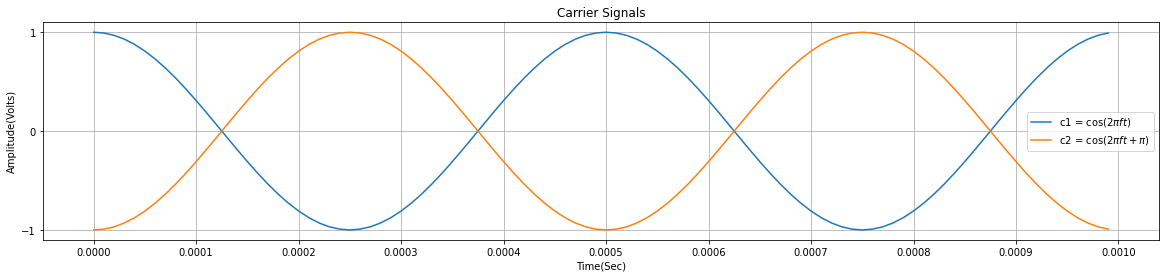

In [155]:
# define the carrier signal
c1 = np.cos(2*np.pi*f*t);               # carrier signal for binary value '0'
c2 = np.cos(2*np.pi*f*t + np.pi/2);     # carrier signal for binary value '1'

# plot the carrier signal for 1 bit period
plt.figure(figsize=(20,4))
t_  = Tb*np.arange(0,1,1/100)
plt.plot(t_,np.cos(2*np.pi*f*t_))
plt.plot(t_,np.cos(2*np.pi*f*t_ + np.pi))
plt.xlabel('Time(Sec)')
plt.ylabel('Amplitude(Volts)')
plt.xticks(np.arange(0,Tb+Tb/10,Tb/10))
plt.yticks(np.arange(-1,1.5,1))
plt.grid(True)
plt.title('Carrier Signals')
plt.legend(['c1 = $\cos(2\pi ft$)','c2 = $\cos(2\pi ft + \pi)$'])
plt.show()

## 1.2. Generate and plot the binary data sequence

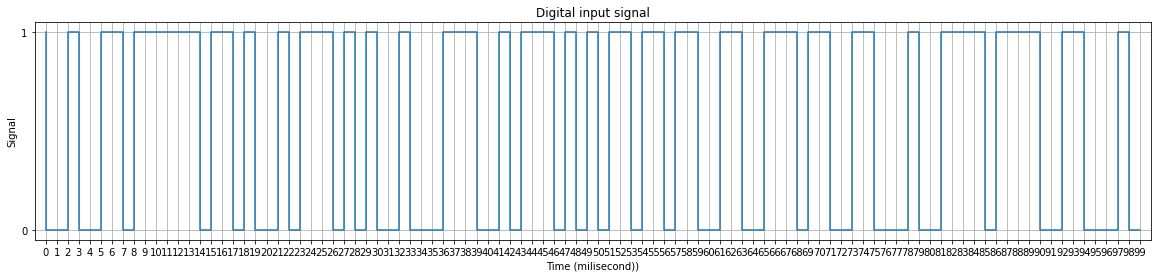

In [156]:
# generate the binary data sequence
digit = np.empty(shape=0, dtype=int); 
for i in range(0,n,1):
    if x[i] == 1:
        digit =np.append(digit,np.ones(nb))
    else:
        digit =np.append(digit,np.zeros(nb))

# plot the binary data signal
plt.figure(figsize = (20, 4))   
plt.title('Digital input signal')
plt.xticks(1000*np.arange(0,Tb*n,Tb))
plt.xlabel('Time (milisecond))')
plt.ylabel('Signal')
plt.yticks([0,1])
plt.step(1000*np.arange(0,Tb*n,Tb), x)
plt.grid(True)
plt.margins(x=0.01, y=0.05)
plt.show()

## 1.3. Perform PSK modulation and plot the PSK modulated signal

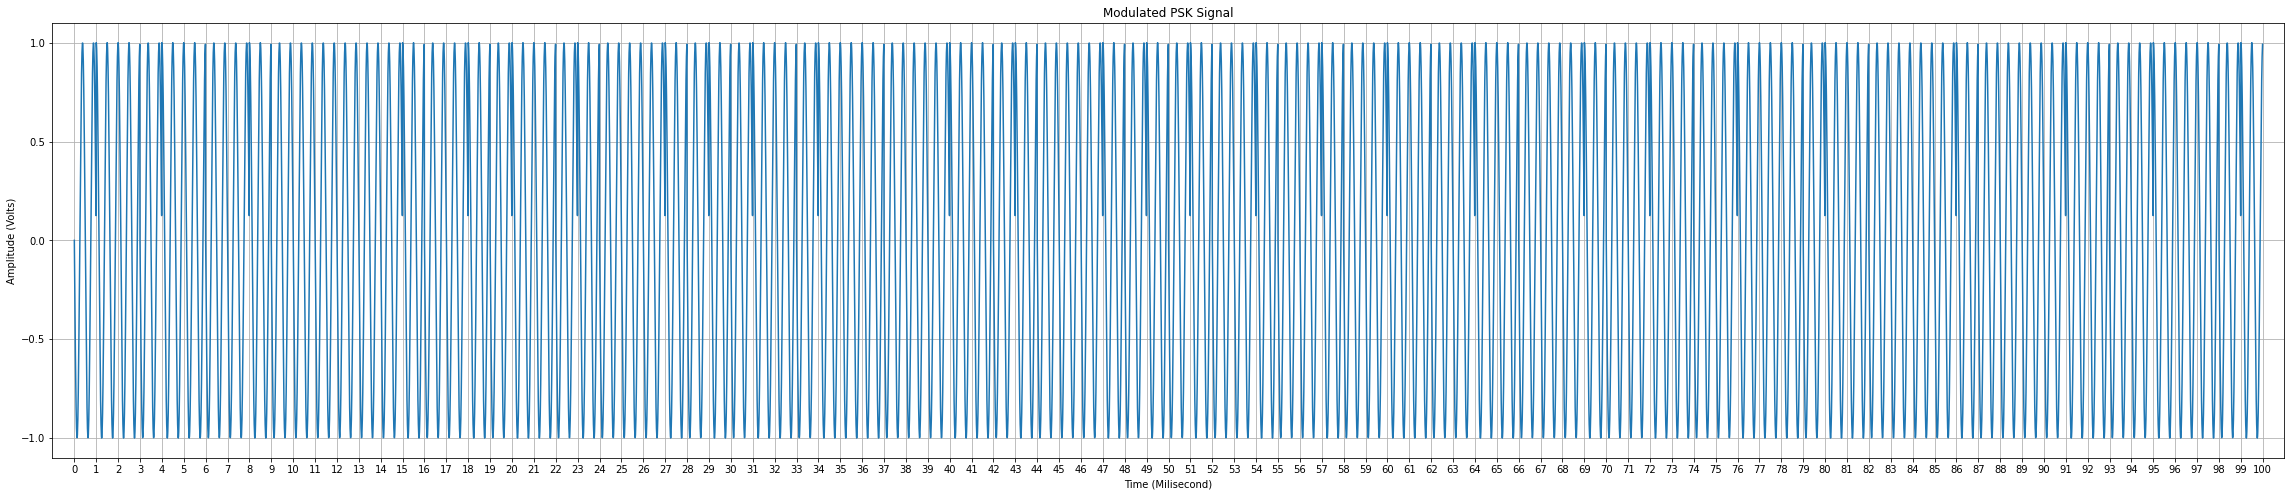

In [157]:
# perform PSK modulation
mod = np.where(digit==0, c1, digit*c2)

# plot the PSK modulated signal
plt.figure(figsize=(40,8))
plt.plot(1000*t,mod)
plt.xlabel('Time (Milisecond)')
plt.ylabel('Amplitude (Volts)')
plt.xticks(1000*np.arange(0,Tb*n+Tb,Tb))
plt.yticks(np.arange(-1,1.5,0.5))
plt.grid(True)
plt.title('Modulated PSK Signal')
plt.margins(x=0.01, y=0.05)
plt.show()


# 2. PSK Demodulation

## Demodulated binary data

In [158]:
# function to demodulate the signal
def demodulate(mod):
    demod=np.empty(shape=n, dtype=int)
    for i in range(0, n*nb, nb):
        I1 = np.trapz(mod[i:i+nb]*c1[i:i+nb])
        e1 = np.sum(c1[i:i+nb]**2)
        I2 = np.trapz(mod[i:i+nb]*c2[i:i+nb])
        e2 = np.sum(c2[i:i+nb]**2)
        if I1 - 1/2*e1 > I2 - 1/2*e2:
            demod[np.floor(i/nb).astype('int')] = 0
        else:
            demod[np.floor(i/nb).astype('int')] = 1
    return demod

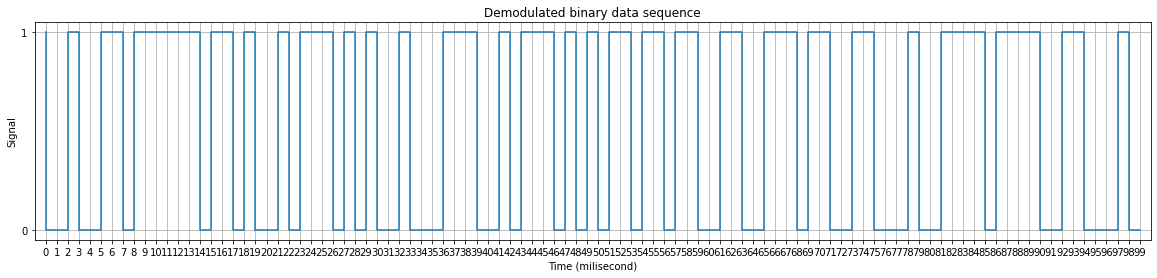

In [159]:
# demodulate the signal
demod = demodulate(mod)

# plot the demodulated binary data sequence
plt.figure(figsize = (20, 4))   
plt.title('Demodulated binary data sequence')
plt.xticks(1000*np.arange(0,Tb*n,Tb))
plt.xlabel('Time (milisecond)')
plt.ylabel('Signal')
plt.yticks([0,1])
plt.step(1000*np.arange(0,Tb*n,Tb), demod)
plt.margins(x=0.01, y=0.05)
plt.grid(True)

# 3. PSK modulation/demodulation under the effects of Gaussian noise

## 3.1. PSK Modulation with AWGN

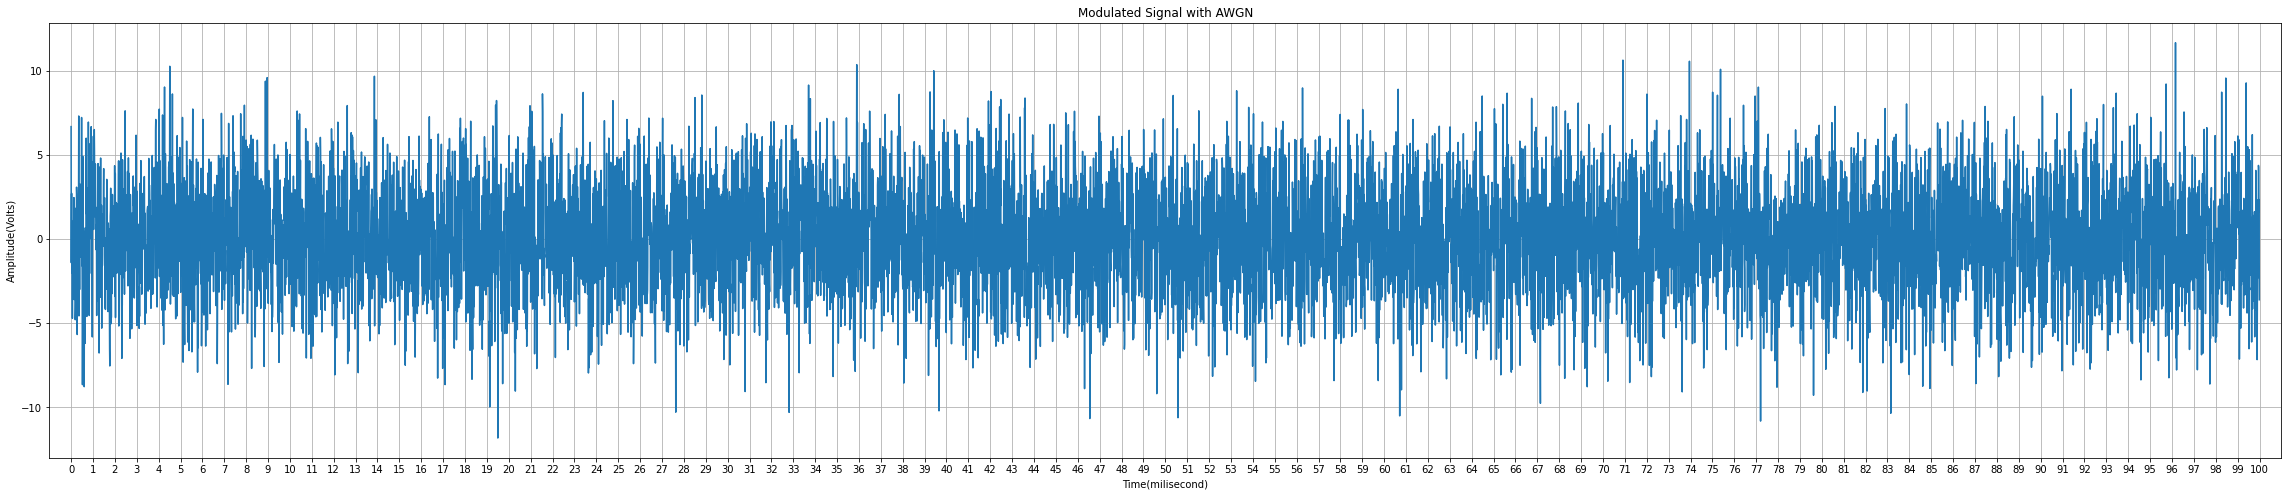

In [160]:
# add Gaussian noise with zero mean and variance N0/2 to the transmitted waveform
mean = 0
N0 = 18
standard_deviation = np.sqrt(N0/2)
noise = np.random.normal(mean, standard_deviation, len(mod))
mod_noise = mod + noise

# plot the modulated signal with AWGN
plt.figure(figsize=(40, 8))
plt.plot(1000*t,mod_noise)
plt.xlabel('Time(milisecond)')
plt.ylabel('Amplitude(Volts)')
plt.xticks(1000*np.arange(0,Tb*n+Tb,Tb))
plt.grid(True)
plt.title('Modulated Signal with AWGN')
plt.margins(x=0.01, y=0.05)
plt.show()

## 3.2. PSK Demodulation with AWGN

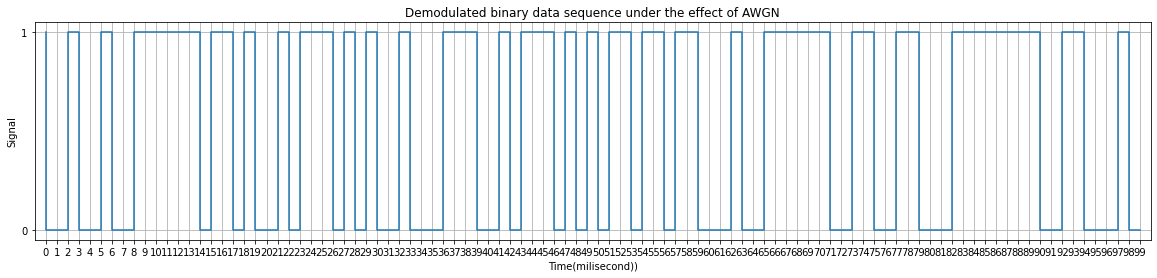

In [161]:
# demodulate the signal with AWGN
demod_noise = demodulate(mod_noise)

# plot the demodulated binary data sequence under the effect of AWGN
plt.figure(figsize = (20, 4))   
plt.title('Demodulated binary data sequence under the effect of AWGN')
plt.xticks(1000*np.arange(0,Tb*n,Tb))
plt.xlabel('Time(milisecond))')
plt.ylabel('Signal')
plt.yticks([0,1])
plt.step(1000*np.arange(0,Tb*n,Tb), demod_noise)
plt.grid(True)
plt.margins(x=0.01, y=0.05)
plt.show()

## 3.3 For BPSK , one symbol (carrier phase) represents one bit and hence symbol rate equals bit rate

In [162]:
error_bits = np.count_nonzero(demod_noise - x)
Pb = error_bits / len(x) * 100
print(f"Bit Error Rate: {Pb}%")

Bit Error Rate: 6.0%


# 4. Derive the bit error probability

In [163]:
from scipy.special import erfc
Eb = Tb/2
Pb_theory = 1/2*erfc(np.sqrt(Eb/N0)) * 100
Pb_theory = np.round(Pb_theory, 2)
print(f"Bit Error Rate according to the theory: P(e) = {Pb_theory}%")

Bit Error Rate according to the theory: P(e) = 49.7%
